# Two modifications of  mean-variance portfolio theory

#### Daniel Csaba, Thomas J. Sargent and Balint Szoke

#### December 2016

### Remarks about estimating means and variances

The famous **Black-Litterman** (1992) portfolio choice model that we describe in this notebook is motivated by the finding that with high or moderate frequency data, means are more difficult to estimate than variances.

A model of **robust portfolio choice** that we'll describe also begins from the same
starting point.  

To begin, we'll take for granted that means are more difficult to estimate than covariances and will focus on how  Black and Litterman, on the one hand, an robust control theorists, on the other, would recommend modifying the **mean-variance portfolio choice model** to take that into account.

At the end of this notebook, we shall  use some rates of convergence results and some simulations to verify how means are more difficult to estimate than variances. 

Among the ideas in play in this notebook will be 

   * mean-variance portfolio theory
   
   * Bayesian approaches to estimating linear regressions
   
   * A risk-sensitivity operator and its connection to robust control theory

In [2]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stat
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider



## Adjusting mean-variance portfolio choice theory for distrust of mean excess returns


This notebook describes two lines of thought that modify the classic mean-variance
portfolio choice model in ways designed to make its recommendations more plausible.


As we mentioned above, the two approaches build on a common hunch -- that because it is much easier statistically to estimate covariances of excess returns than it is to estimate their means, it makes sense to contemplated the consequences of adjusting investors'
subjective beliefs about mean returns in order to render more sensible decisions.

Both of the adjustments that we describe are designed to confront a  widely recognized  embarassment  to mean-variance portfolio theory, namely, that it usually implies taking
very extreme long-short portfolio positions.




##### Mean-variance portfolio choice

A risk free security earns one-period net return $r_f$. 

An $n \times 1$ vector  of risky securities earns an $n \times 1$
vector $\vec r - r_f {\bf 1}$ of *excess returns*, where ${\bf 1}$ is
an $n \times 1$ vector of ones.

The excess return vector is multivariate normal with mean $\mu$ and covariance
matrix $\Sigma$, which we express either as

$$ \vec r - r_f {\bf 1} \sim {\mathcal N}(\mu, \Sigma) $$

or 

$$ \vec r - r_f {\bf 1} = \mu + C \epsilon  $$

where $\epsilon \sim {\mathcal N}(0, I)$ is an $n \times 1 $ random vector.


Let $w $ be an $n\times 1$ vector of portfolio weights.   

A portfolio consisting $w$ earns returns

$$ w' (\vec r - r_f {\bf 1}) \sim {\mathcal N}(w' \mu, w' \Sigma w ) $$

The **mean-variance portfolio choice problem** is to choose $w$ to maximize

$$ U(\mu,\Sigma;w) = w'\mu - \frac{\delta}{2} w' \Sigma w   ,  \quad (1) $$

where $\delta > 0 $ is a risk-aversion parameter.  The first-order condition for
maximizing (1) with respect to the vector $w$ is

$$ \mu = \delta \Sigma w ,  \quad (2) $$

which implies the following design of a risky portfolio:

$$ w = (\delta \Sigma)^{-1} \mu , \quad (3)  $$


##### Estimating $\mu$ and $\Sigma$

The key inputs into the portfolio choice model (3) are

   * estimates of the parameters $\mu, \Sigma$ of the random excess return vector $(\vec r - r_f {\bf 1})$
   
   * the risk-aversion parameter $\delta$
   
A standard way of estimating $\mu$ is maximum-likelihood or least squares; that
amounts to estimating $\mu$ by a sample mean of excess returns and estimating $\Sigma$
by a sample covariance matrix.

###### The Black-Litterman starting point

When estimates of $\mu$ and $\Sigma$ from historical sample means and covariances
have been combined with ``reasonable'' values of the risk-aversion parameter $\delta$
to compute an optimal portfolio from formula (3), a typical outcome has been
$w$'s with **extreme long and short positions**.  A common reaction to these outcomes
is that they are so unreasonable that a portfolio manager cannot recommend them to a
customer.

In [2]:
#========================================
# Primitives of the laboratory
#========================================
np.random.seed(12)

N = 10                                           # number of assets
T = 200                                          # sample size

# random market portfolio (sum is normalized to 1)
w_m = np.random.rand(N) 
w_m = w_m/(w_m.sum())                      

# True risk premia and variance of excess return 
#          (constructed so that the Sharpe ratio is 1)
Mu = (np.random.randn(N) + 5)/100                   # mean excess return (risk premium)   
S = np.random.randn(N, N)                           # random matrix for the covariance matrix
V = S @ S.T                                         # turn the random matrix into symmetric psd   
Sigma = V * (w_m @ Mu)**2 / (w_m @ V @ w_m)         # make sure that the Sharpe ratio is one

# Risk aversion of market portfolio holder
delta = 1 / np.sqrt(w_m @ Sigma @ w_m)

# Generate a sample of excess returns
excess_return = stat.multivariate_normal(Mu, Sigma)
sample = excess_return.rvs(T)

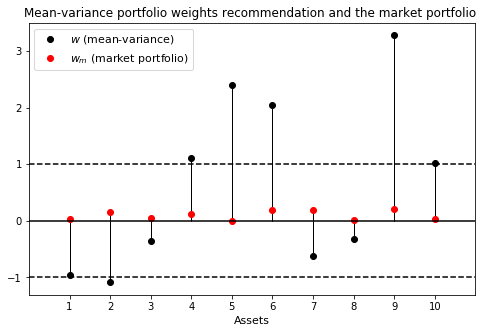

In [3]:
#==================================
# Mean-variance portfolio
#==================================

# Estimate mu and sigma
Mu_est = sample.mean(0).reshape(N, 1)
Sigma_est = np.cov(sample.T)


# Solve the constrained problem for the weights (with iota @ w = 1)
#iota = np.ones((N, 1))                                    # column vector of ones
#def lamb(mu, sigma, delta):
#    aux_vector = iota.T @ np.linalg.inv(delta * sigma)    # save memory
#    return ((1 - aux_vector @ mu) / (aux_vector @ iota))[0]    # lagrange multiplier on the const
#w = np.linalg.solve(d_m * sigma_hat, mu_hat) + lamb(mu_hat, sigma_hat, delta) * iota)

w = np.linalg.solve(delta * Sigma_est, Mu_est)

fig, ax = plt.subplots(figsize = (8, 5))
ax.set_title('Mean-variance portfolio weights recommendation and the market portfolio ', fontsize = 12)
ax.plot(np.arange(N) + 1, w, 'o', color = 'k', label = '$w$ (mean-variance)')
ax.plot(np.arange(N) + 1, w_m, 'o', color = 'r', label = '$w_m$ (market portfolio)')
ax.vlines(np.arange(N) + 1, 0, w, lw = 1)
ax.vlines(np.arange(N) + 1, 0, w_m, lw = 1)
ax.axhline(0, color = 'k')
ax.axhline(-1, color = 'k', linestyle = '--')
ax.axhline(1, color = 'k', linestyle = '--')
ax.set_xlim([0, N+1])
ax.set_xlabel('Assets', fontsize = 11)
ax.xaxis.set_ticks(np.arange(1, N + 1, 1))
plt.legend(numpoints = 1, loc = 'best', fontsize = 11)
plt.show()

Black and Litterman's  responded  to this situation in the following way:


  * They continue to accept (3) as a good model for choosing an optimal portfolio $w$
  
  * They want to continue to allow the customer to express his or her risk tolerance by 
setting $\delta$

  * Leaving $\Sigma$ at its maximum-likelihood value, they  push  $\mu$ away from its maximum value in a way designed to make portfolio choices that are more plausible in terms of conforming to what most people actually do.  
  

In particular, given $\Sigma$ and a reasonable value of $\delta$, Black and Litterman
reverse engineered a vector $\mu_{BL}$ of mean excess returns that makes the $w$ implied
by formula (3) equal the **actual** market portfolio $w_m$, so that 

$$ w_m = (\delta \Sigma)^{-1} \mu_{BL} \quad (4) $$

##### Details

Let's define

$$ w_m' \mu \equiv ( r_m - r_f)  $$

as the (scalar) excess return on the market portfolio $w_m$.  

Define

$$ \sigma^2 = w_m' \Sigma w_m  $$

as the variance of the excess return on the market portfolio $w_m$.

Define

$$ {\bf SR}_m = \frac{ r_m - r_f}{\sigma}  $$

as the **Sharpe-ratio** on the market portfolio $w_m$.

Let $\delta_m$ be the value of the risk aversion parameter that induces  an investor
to hold the market portfolio in light of the optimal portfolio choice rule (3).  

Evidently, portfolio rule  (3) then implies that  $ r_m - r_f = \delta_m \sigma^2 $
or

$$ \delta_m = \frac{r_m - r_f}{\sigma^2}  $$

or 

$$ \delta_m = \frac{\bf SR}{\sigma}, \quad (5) $$

Following the Black-Litterman philosophy, our first step will be to back a value
of $\delta_m$ from

  * an estimate of the Sharpe-ratio, and
  
  * our maximum likelihood estimate of $\sigma$ drawn from  our estimates or $w_m$ and $\Sigma$

The second key Black-Litterman step is then to use this value of $\delta$ together
with the maximum likelihood estimate of $\Sigma$ to deduce a $\mu_{\bf BL}$ that
verifies portfolio rule (3) at the market portfolio $w = w_m$:

$$ \mu_m = \delta_m \Sigma w_m   $$

The starting point of the Black-Litterman portfolio choice model is thus
a pair $(\delta_m, \mu_m) $ that tells the customer to hold the market portfolio.


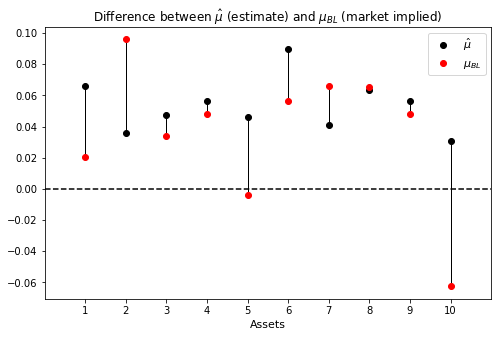

In [4]:
# =====================================================
# Derivation of Black-Litterman pair (\delta_m, \mu_m)
# =====================================================

# Observed mean excess market return
r_m = w_m @ Mu_est

# Estimated variance of market portfolio
sigma_m = w_m @ Sigma_est @ w_m

# Sharpe-ratio
SR_m = r_m/np.sqrt(sigma_m)

# Risk aversion of market portfolio holder
d_m = r_m/sigma_m

# Derive "view" which would induce market portfolio
mu_m = (d_m * Sigma_est @ w_m).reshape(N, 1)

fig, ax = plt.subplots(figsize = (8, 5))
ax.set_title(r'Difference between $\hat{\mu}$ (estimate) and $\mu_{BL}$ (market implied)', fontsize = 12)
ax.plot(np.arange(N) + 1, Mu_est, 'o', color = 'k', label = '$\hat{\mu}$')
ax.plot(np.arange(N) + 1, mu_m, 'o', color = 'r', label = '$\mu_{BL}$')
ax.vlines(np.arange(N) + 1, mu_m, Mu_est, lw = 1)
ax.axhline(0, color = 'k', linestyle = '--')
ax.set_xlim([0, N + 1])
ax.set_xlabel('Assets', fontsize = 11)
ax.xaxis.set_ticks(np.arange(1, N + 1, 1))
plt.legend(numpoints = 1, loc = 'best', fontsize = 11)
plt.show()

##### Adding ``views''

Black and Litterman start with  a baseline customer who asserts that he or she shares
the ``market's views'', which means that his or her believes that excess returns
are governed by

 $$ \vec r - r_f {\bf 1} \sim {\mathcal N}( \mu_{BL}, \Sigma)   , \quad (6) $$
 
Black and Litterman would advise that customer to hold the market portfolio of risky securities.

Black and Litterman then imagine a consumer who would like to express a view that
differs from the market's.  The consumer wants appropriately to mix his view with
the market's before using (3) to choose a portfolio.

Suppose that the customer's view is expressed by a hunch that rather than (6), 
excess returns are governed  by

$$ \vec r - r_f {\bf 1} \sim {\mathcal N}( \hat \mu, \tau \Sigma)   , \quad (7) $$

where $\tau > 0$ is a scalar parameter that determines how the decision maker
wants to mix his view $\hat \mu$ with the market's view $\mu_{\bf BL}$.  

Black and Litterman would then use a formula like the following one to mix the
views $\hat \mu$ and $\mu_{\bf BL}$:


$$\tilde \mu = (\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1} \mu_{BL}  + (\tau \Sigma)^{-1} \hat \mu)  , \quad (8) $$

Black and Litterman would then advice the customer to hold the portfolio associated
with these views implied by rule (3):


$$ \tilde w = (\delta \Sigma)^{-1} \tilde \mu , \quad (9)  $$

This portfolio $\tilde w$ will deviate from the portfolio $w_{BL}$ in amounts that
depend on the mixing parameter $\tau$.  

If $\hat \mu$ is the maximum likelihood estimator and $\tau$ is chosen heavily to 
weight this view, then the customer's portfolio will involve big short-long positions.

In [5]:
def Black_Litterman(lamb, mu_1, mu_2, Sigma_1, Sigma_2):
    """
    This function calculates the Black-Litterman mixture 
    mean excess return and covariance matrix
    """    
    sigma1_inv = np.linalg.inv(Sigma_1)
    sigma2_inv = np.linalg.inv(Sigma_2)
    
    mu_tilde = np.linalg.solve(sigma1_inv + lamb * sigma2_inv, 
                               sigma1_inv @ mu_1 + lamb * sigma2_inv @ mu_2)
    return mu_tilde

#===================================
# Example cont'
#     mean : MLE mean
#     cov  : scaled MLE cov matrix
#===================================

tau = 1
mu_tilde = Black_Litterman(1, mu_m, Mu_est, Sigma_est, tau * Sigma_est)

# The Black-Litterman recommendation for the portfolio weights
w_tilde = np.linalg.solve(delta * Sigma_est, mu_tilde)

In [7]:
tau_slider = FloatSlider(min = 0.05, max = 10, step = 0.5, value = tau)

@interact(tau = tau_slider)
def BL_plot(tau):
    mu_tilde = Black_Litterman(1, mu_m, Mu_est, Sigma_est, tau * Sigma_est)
    w_tilde = np.linalg.solve(delta * Sigma_est, mu_tilde)
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].set_title(r'Relationship between $\hat{\mu}$, $\mu_{BL}$ and $\tilde{\mu}$', fontsize = 15)
    ax[0].plot(np.arange(N) + 1, Mu_est, 'o', color = 'k', label = r'$\hat{\mu}$ (subj view)')
    ax[0].plot(np.arange(N) + 1, mu_m, 'o', color = 'r', label = r'$\mu_{BL}$ (market)')
    ax[0].plot(np.arange(N) + 1, mu_tilde, 'o', color = 'y', label = r'$\tilde{\mu}$ (mixture)')
    ax[0].vlines(np.arange(N) + 1, mu_m, Mu_est, lw = 1)
    ax[0].axhline(0, color = 'k', linestyle = '--')
    ax[0].set_xlim([0, N + 1])
    ax[0].xaxis.set_ticks(np.arange(1, N + 1, 1))
    ax[0].set_xlabel('Assets', fontsize = 14)
    ax[0].legend(numpoints = 1, loc = 'best', fontsize = 13)

    ax[1].set_title('Black-Litterman portfolio weight recommendation', fontsize = 15)
    ax[1].plot(np.arange(N) + 1, w, 'o', color = 'k', label = r'$w$ (mean-variance)')
    ax[1].plot(np.arange(N) + 1, w_m, 'o', color = 'r', label = r'$w_{m}$ (market, BL)')
    ax[1].plot(np.arange(N) + 1, w_tilde, 'o', color = 'y', label = r'$\tilde{w}$ (mixture)')
    ax[1].vlines(np.arange(N) + 1, 0, w, lw = 1)
    ax[1].vlines(np.arange(N) + 1, 0, w_m, lw = 1)
    ax[1].axhline(0, color = 'k')
    ax[1].axhline(-1, color = 'k', linestyle = '--')
    ax[1].axhline(1, color = 'k', linestyle = '--')
    ax[1].set_xlim([0, N + 1])
    ax[1].set_xlabel('Assets', fontsize = 14)
    ax[1].xaxis.set_ticks(np.arange(1, N + 1, 1))
    ax[1].legend(numpoints = 1, loc = 'best', fontsize = 13)

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='tau', max=10.0, min=0.05, step=0.5), Output()), _dom…

### Bayes interpretation of the Black-Litterman recommendation

Consider the following Bayesian interpretation of the Black-Litterman recommendation.

The prior belief over the mean excess returns is consistent with the market porfolio and is given by

$$ \mu \sim \mathcal{N}(\mu_{BL}, \Sigma).$$

Given a particular realization of the mean excess returns $\mu$ one observes the average excess returns $\hat \mu$ on the market according to the distribution

$$\hat \mu \mid \mu, \Sigma \sim \mathcal{N}(\mu, \tau\Sigma).$$

where $\tau$ is typically small capturing the idea that the variation in the mean is smaller than the variation of the individual random variable.

Given the realized excess returns one should then update the prior over the mean excess returns according to Bayes rule. The corresponding posterior over mean excess returns is normally distributed with mean
$$ (\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1}\mu_{BL}   + (\tau \Sigma)^{-1} \hat \mu)$$

The covariance matrix is 

$$ (\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1}.$$

Hence, the Black-Litterman recommendation is consistent with the Bayes update of the prior over the mean excess returns in light of the realized average excess returns on the market.


### Curve Decolletage

Consider two independent "competing" views on the excess market returns.

 $$ \vec r_e  \sim {\mathcal N}( \mu_{BL}, \Sigma) $$
 
and 

 $$ \vec r_e \sim {\mathcal N}( \hat{\mu}, \tau\Sigma). $$
 
A special feature of the multivariate normal random variable $Z$ is that its density function depends only on the (Euclidiean) length of its realization $z$. Formally, let the $k$-dimensional random vector be $Z\sim \mathcal{N}(\mu, \Sigma)$, then $\bar{Z} \equiv \Sigma(Z-\mu)\sim \mathcal{N}(\mathbf{0}, I)$ and so the points where the density takes the same value can be described by the ellipse  

$$\bar z \cdot \bar z =  (z - \mu)'\Sigma^{-1}(z - \mu) = \bar d \quad \quad (10)$$

where $\bar d\in\mathbb{R}_+$ denotes the (transformation) of a particular density value. The curves defined by equation (10) can be labelled as iso-likelihood ellipses.

> **Remark:** More generally there is a class of density functions that possesses this feature, i.e. 

> $$\exists g: \mathbb{R}_+ \mapsto \mathbb{R}_+ \ \ \text{ and } \ \ c \geq 0, \ \ \text{s.t.  the density } \ \ f \ \ \text{of} \ \ Z  \ \ \text{ has the form } \quad f(z) = c g(z\cdot z)$$  

> This property is called **spherical symmetry** (see p 81. in Leamer (1978)).

In our specific example, we can use the pair $(\bar d_1, \bar d_2)$ as being two "likelihood" values for which the corresponding isolikelihood ellipses in the excess return space are given by

\begin{align}
(\vec r_e - \mu_{BL})'\Sigma^{-1}(\vec r_e - \mu_{BL}) &= \bar d_1 \\
(\vec r_e - \hat \mu)'\left(\tau \Sigma\right)^{-1}(\vec r_e - \hat \mu) &= \bar d_2
\end{align}

Notice that for particular $\bar d_1$ and $\bar d_2$ values the two ellipses have a tangency point. These tangency points, indexed by the pairs $(\bar d_1, \bar d_2)$, characterize points $\vec r_e$ from which there exists no deviation where one can increase the likelihood of one view without decreasing the likelihood of the other view. The pairs $(\bar d_1, \bar d_2)$ for which there is such a point outlines a curve in the excess return space. This curve is reminiscent of the Pareto curve in an Edgeworth-box setting.

Leamer (1978) calls this curve *information contract curve* and describes it by the following program: maximize the likelihood of one view, say the Black-Litterman recommendation, while keeping the likelihood of the other view at least at a prespecified constant $\bar d_2$.

\begin{align*}
 \bar d_1(\bar d_2) &\equiv \max_{\vec r_e} \ \ (\vec r_e - \mu_{BL})'\Sigma^{-1}(\vec r_e - \mu_{BL}) \\
\text{subject to }  \quad  &(\vec r_e - \hat\mu)'(\tau\Sigma)^{-1}(\vec r_e - \hat \mu) \geq \bar d_2
\end{align*}

Denoting the multiplier on the constraint by $\lambda$, the first-order condition is

 $$ 2(\vec r_e - \mu_{BL} )'\Sigma^{-1} + \lambda 2(\vec r_e - \hat\mu)'(\tau\Sigma)^{-1} = \mathbf{0} $$
 
which defines the *information contract curve* between $\mu_{BL}$ and $\hat \mu$
 
 $$ \vec r_e = (\Sigma^{-1} + \lambda (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1} \mu_{BL}  + \lambda (\tau \Sigma)^{-1}\hat \mu ) \quad \quad (11)$$
 
Note that if $\lambda = 1$, (11) is equivalent with (8) and it identifies one point on the information contract curve. Furthermore, because $\lambda$ is a function of the minimum likelihood $\bar d_2$ on the RHS of the constraint, by varying $\bar d_2$ (or $\lambda$), we can trace out the whole curve as the figure below illustrates. 

In [8]:
#========================================
# Draw a new sample for two assets
#========================================
np.random.seed(1987102)

N_new = 2                                           # number of assets
T_new = 200                                         # sample size

tau_new = .8

# random market portfolio (sum is normalized to 1)
w_m_new = np.random.rand(N_new) 
w_m_new = w_m_new/(w_m_new.sum())                      

Mu_new = (np.random.randn(N_new) + 5)/100                   
S_new = np.random.randn(N_new, N_new)                       
V_new = S_new @ S_new.T                                     
Sigma_new = V_new * (w_m_new @ Mu_new)**2 / (w_m_new @ V_new @ w_m_new)

excess_return_new = stat.multivariate_normal(Mu_new, Sigma_new)
sample_new = excess_return_new.rvs(T_new)

Mu_est_new = sample_new.mean(0).reshape(N_new, 1)
Sigma_est_new = np.cov(sample_new.T)

sigma_m_new = w_m_new @ Sigma_est_new @ w_m_new
d_m_new = (w_m_new @ Mu_est_new)/sigma_m_new
mu_m_new = (d_m_new * Sigma_est_new @ w_m_new).reshape(N_new, 1)

In [9]:
N_r1, N_r2 = 100, 100
r1 = np.linspace(-0.04, .1, N_r1)
r2 = np.linspace(-0.02, .15, N_r2)

lamb_grid = np.linspace(.001, 20, 100)
curve = np.asarray([Black_Litterman(l, mu_m_new, Mu_est_new, Sigma_est_new, 
                                    tau_new*Sigma_est_new).flatten() for l in lamb_grid]) 

lamb_slider = FloatSlider(min = .1, max = 7, step = .5, value = 1)

@interact(lamb = lamb_slider)
def decolletage(lamb):
    dist_r_BL = stat.multivariate_normal(mu_m_new.squeeze(), Sigma_est_new)
    dist_r_hat = stat.multivariate_normal(Mu_est_new.squeeze(), tau_new * Sigma_est_new)
    
    X, Y = np.meshgrid(r1, r2)
    Z_BL = np.zeros((N_r1, N_r2))
    Z_hat = np.zeros((N_r1, N_r2))

    for i in range(N_r1):
        for j in range(N_r2):
            Z_BL[i, j] = dist_r_BL.pdf(np.hstack([X[i, j], Y[i, j]]))
            Z_hat[i, j] = dist_r_hat.pdf(np.hstack([X[i, j], Y[i, j]]))
    
    mu_tilde_new = Black_Litterman(lamb, mu_m_new, Mu_est_new, Sigma_est_new, 
                                   tau_new * Sigma_est_new).flatten()
    
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.contourf(X, Y, Z_hat, cmap = 'viridis', alpha =.4)
    ax.contourf(X, Y, Z_BL, cmap = 'viridis', alpha =.4)
    ax.contour(X, Y, Z_BL, [dist_r_BL.pdf(mu_tilde_new)], cmap = 'viridis', alpha = .9)
    ax.contour(X, Y, Z_hat, [dist_r_hat.pdf(mu_tilde_new)], cmap = 'viridis', alpha = .9)
    ax.scatter(Mu_est_new[0], Mu_est_new[1])
    ax.scatter(mu_m_new[0], mu_m_new[1])
    
    ax.scatter(mu_tilde_new[0], mu_tilde_new[1], color = 'k', s = 20*3)
    
    ax.plot(curve[:, 0], curve[:, 1], color = 'k')
    ax.axhline(0, color = 'k', alpha = .8)
    ax.axvline(0, color = 'k', alpha = .8)
    ax.set_xlabel(r'Excess return on the first asset, $r_{e, 1}$', fontsize = 12)
    ax.set_ylabel(r'Excess return on the second asset, $r_{e, 2}$', fontsize = 12)
    ax.text(Mu_est_new[0] + 0.003, Mu_est_new[1], r'$\hat{\mu}$', fontsize = 20)
    ax.text(mu_m_new[0] + 0.003, mu_m_new[1] + 0.005, r'$\mu_{BL}$', fontsize = 20)


interactive(children=(FloatSlider(value=1.0, description='lamb', max=7.0, min=0.1, step=0.5), Output()), _dom_…

Note that the line that connects the two points $\hat \mu$ and $\mu_{BL}$ is linear, which comes from the fact that the covariance matrices of the two competing distributions (views) are proportional to each other. 

To illustrate the fact that this is not necessarily the case, consider another example using the same parameter values, except that the "second view" constituting the constraint has covariance matrix $\tau I$ instead of $\tau \Sigma$. This leads to the following figure, on which the curve connecting $\hat \mu$ and $\mu_{BL}$ are bending.


In [10]:
lamb_grid2 = np.linspace(.001, 20000, 1000)
curve2 = np.asarray([Black_Litterman(l, mu_m_new, Mu_est_new, Sigma_est_new, 
                                    tau_new*np.eye(N_new)).flatten() for l in lamb_grid2]) 

lamb_slider2 = FloatSlider(min = 5, max = 1500, step = 100, value = 200)

@interact(lamb = lamb_slider2)
def decolletage(lamb):
    dist_r_BL = stat.multivariate_normal(mu_m_new.squeeze(), Sigma_est_new)
    dist_r_hat = stat.multivariate_normal(Mu_est_new.squeeze(), tau_new * np.eye(N_new))
    
    X, Y = np.meshgrid(r1, r2)
    Z_BL = np.zeros((N_r1, N_r2))
    Z_hat = np.zeros((N_r1, N_r2))

    for i in range(N_r1):
        for j in range(N_r2):
            Z_BL[i, j] = dist_r_BL.pdf(np.hstack([X[i, j], Y[i, j]]))
            Z_hat[i, j] = dist_r_hat.pdf(np.hstack([X[i, j], Y[i, j]]))
    
    mu_tilde_new = Black_Litterman(lamb, mu_m_new, Mu_est_new, Sigma_est_new, 
                                   tau_new * np.eye(N_new)).flatten()
    
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.contourf(X, Y, Z_hat, cmap = 'viridis', alpha = .4)
    ax.contourf(X, Y, Z_BL, cmap = 'viridis', alpha = .4)
    ax.contour(X, Y, Z_BL, [dist_r_BL.pdf(mu_tilde_new)], cmap='viridis', alpha =.9)
    ax.contour(X, Y, Z_hat, [dist_r_hat.pdf(mu_tilde_new)], cmap='viridis', alpha =.9)
    ax.scatter(Mu_est_new[0], Mu_est_new[1])
    ax.scatter(mu_m_new[0], mu_m_new[1])
    
    ax.scatter(mu_tilde_new[0], mu_tilde_new[1], color = 'k', s = 20*3)
    
    ax.plot(curve2[:, 0], curve2[:, 1], color = 'k')
    ax.axhline(0, color = 'k', alpha = .8)
    ax.axvline(0, color = 'k', alpha = .8)
    ax.set_xlabel(r'Excess return on the first asset, $r_{e, 1}$', fontsize = 12)
    ax.set_ylabel(r'Excess return on the second asset, $r_{e, 2}$', fontsize = 12)
    ax.text(Mu_est_new[0] + 0.003, Mu_est_new[1], r'$\hat{\mu}$', fontsize = 20)
    ax.text(mu_m_new[0] + 0.003, mu_m_new[1] + 0.005, r'$\mu_{BL}$', fontsize = 20)



interactive(children=(FloatSlider(value=200.0, description='lamb', max=1500.0, min=5.0, step=100.0), Output())…

### Black-Litterman recommendation as regularization

First, consider the OLS regression.

$$\min_{\beta} \Vert X\beta - y \Vert^2 $$

which yields the solution

$$ \hat{\beta}_{OLS} = (X'X)^{-1}X'y.$$



A common performance measure of estimators is the *mean squared error (MSE)*. An estimator is "good" if its MSE is realtively small. Suppose that $\beta_0$ is the "true" value of the coefficent, then the MSE of the OLS estimator is 

$$\text{mse}(\hat \beta_{OLS}, \beta_0) := \mathbb E \Vert \hat \beta_{OLS} - \beta_0\Vert^2 = \underbrace{\mathbb E \Vert \hat \beta_{OLS} - \mathbb E  \beta_{OLS}\Vert^2}_{\text{variance}} + \underbrace{\Vert \mathbb E \hat\beta_{OLS} - \beta_0\Vert^2}_{\text{bias}}$$

From this decomposition one can see that in order for the MSE to be small, both the bias and the variance terms must be small. For example, consider the case when $X$ is a $T$-vector of ones (where $T$ is the sample size), so $\hat\beta_{OLS}$ is simply the sample average, while $\beta_0\in \mathbb{R}$ is defined by the true mean of $y$. In this example the MSE is 

$$ \text{mse}(\hat \beta_{OLS}, \beta_0) = \underbrace{\frac{1}{T^2} \mathbb E \left(\sum_{t=1}^{T} (y_{t}- \beta_0)\right)^2 }_{\text{variance}} + \underbrace{0}_{\text{bias}}$$

However, because there is a trade-off between the estimator's bias and variance, there are cases when by permitting a small bias we can substantially reduce the variance so overall the MSE gets smaller. A typical scenario when this proves to be useful is when the number of coefficients to be estimated is large relative to the sample size. 

In these cases one approach to handle the bias-variance trade-off is the so called *Tikhonov regularization*. A general form with regularization matrix $\Gamma$ can be written as

$$\min_{\beta} \Big\{ \Vert X\beta - y \Vert^2 + \Vert \Gamma (\beta - \tilde \beta) \Vert^2 \Big\}$$

which yields the solution

$$ \hat{\beta}_{Reg} = (X'X + \Gamma'\Gamma)^{-1}(X'y + \Gamma'\Gamma\tilde \beta).$$

Substituting the value of $\hat{\beta}_{OLS}$ yields

$$ \hat{\beta}_{Reg} = (X'X + \Gamma'\Gamma)^{-1}(X'X\hat{\beta}_{OLS} + \Gamma'\Gamma\tilde \beta).$$

Often, the regularization matrix takes the form $\Gamma = \lambda I$ with $\lambda>0$ and $\tilde \beta = \mathbf{0}$. Then the Tikhonov regularization is equivalent to what is called *ridge regression* in statistics.


To illustrate how this estimator addresses the bias-variance trade-off, we compute the MSE of the ridge estimator 

$$ \text{mse}(\hat \beta_{\text{ridge}}, \beta_0) = \underbrace{\frac{1}{(T+\lambda)^2} \mathbb E \left(\sum_{t=1}^{T} (y_{t}- \beta_0)\right)^2 }_{\text{variance}} + \underbrace{\left(\frac{\lambda}{T+\lambda}\right)^2 \beta_0^2}_{\text{bias}}$$

The ridge regression shrinks the coefficients of the estimated vector towards zero relative to the OLS estimates thus reducing the variance term at the cost of introducing a "small" bias. However, there is nothing special about the zero vector. When $\tilde \beta \neq \mathbf{0}$ shrinkage occurs in the direction of $\tilde \beta$.


Now, we can give a regularization interpretation of the Black-Litterman portfolio recommendation. To this end, simplify first the equation (8) characterizing the Black-Litterman recommendation

\begin{align*}
\tilde \mu &= (\Sigma^{-1} + (\tau \Sigma)^{-1})^{-1} (\Sigma^{-1}\mu_{BL}  + (\tau \Sigma)^{-1}\hat \mu) \\
&= (1 + \tau^{-1})^{-1}\Sigma \Sigma^{-1} (\mu_{BL}  + \tau ^{-1}\hat \mu) \\
&= (1 + \tau^{-1})^{-1} ( \mu_{BL}  + \tau ^{-1}\hat \mu)
\end{align*}

In our case, $\hat \mu$ is the estimated mean excess returns of securities. This could be written as a vector autoregression where

* $y$ is the stacked vector of observed excess returns of size $(N T\times 1)$ -- $N$ securities and $T$ observations

* $X = \sqrt{T^{-1}}(I_{N} \otimes \iota_T)$ where $I_N$ is the identity matrix and $\iota_T$ is a column vector of ones.

Correspondingly, the OLS regression of $y$ on $X$ would yield the mean excess returns as coefficients. With $\Gamma = \sqrt{\tau T^{-1}}(I_{N} \otimes \iota_T)$ we can write the regularized version of the mean excess return estimation.

\begin{align*}
\hat{\beta}_{Reg} &= (X'X + \Gamma'\Gamma)^{-1}(X'X\hat{\beta}_{OLS} + \Gamma'\Gamma\tilde \beta) \\
&= (1 + \tau)^{-1}X'X (X'X)^{-1} (\hat \beta_{OLS}  + \tau \tilde \beta) \\
&= (1 + \tau)^{-1} (\hat \beta_{OLS}  + \tau \tilde \beta) \\
&= (1 + \tau^{-1})^{-1} ( \tau^{-1}\hat \beta_{OLS}  +  \tilde \beta)
\end{align*}

Given that $\hat \beta_{OLS} = \hat \mu$ and $\tilde \beta = \mu_{BL}$ in the Black-Litterman model we have the following interpretation of the model's recommendation.

The estimated (personal) view of the mean excess returns, $\hat{\mu}$ that would lead to extreme short-long positions are "shrunk" towards the conservative market view, $\mu_{BL}$, 
that leads to the more  conservative market portfolio. 

So the Black-Litterman procedure results in a recommendation that is a compromise between the conservative market portfolio and the  more extreme portfolio that is implied by estimated "personal" views.

### Digression on ${\sf T}$ operator



The Black-Litterman approach is partly inspired by the econometric insight that it
is easier to estimate covariances of excess returns than the means. That is what gave
Black and Litterman license to adjust investors' perception of mean excess returns while not tampering with the covariance matrix of excess returns.  

The robust control theory is another approach that also hinges on adjusting mean excess
returns but not covariances.

Associated with a robust control problem is what Hansen and Sargent call
a ${\sf T}$ operator.  


Let's define the ${\sf T}$ operator as it applies to the problem at hand.

Let $x$ be an $n \times 1$ Gaussian  random vector with mean vector $\mu$ and
covariance matrix $\Sigma = C C'$.  This means that $x$ can be represented
as

$$ x = \mu + C \epsilon  $$

where $\epsilon \sim {\mathcal N}(0,I)$.  

Let $\phi(\epsilon)$ denote the associated standardized Gaussian density.

Let $m(\epsilon,\mu)$ be a **likelihood ratio**, meaning that it satisfies

  * $m(\epsilon, \mu) > 0 $

  * $ \int m(\epsilon,\mu) \phi(\epsilon) d \epsilon  =1 $

That is, $m(\epsilon, \mu)$ is a nonnegative random variable with mean 1. 


Multiplying $\phi(\epsilon) $ by the likelihood ratio $m(\epsilon, \mu)$ produces
a distorted distribution for $\epsilon$, namely,

$$ \tilde \phi(\epsilon) = m(\epsilon,\mu) \phi(\epsilon)  $$

The next concept that we need is the **entropy** of the distorted distribution
$\tilde \phi$ with respect to $\phi$. 

**Entropy**  is defined as


$$ {\rm ent} = \int \log m(\epsilon,\mu) m(\epsilon,\mu) \phi(\epsilon) d \epsilon $$

or 

$$ {\rm ent} = \int \log m(\epsilon,\mu) \tilde \phi(\epsilon) d \epsilon $$


That is, relative entropy is the expected value of the likelihood ratio $m$ where the
expectation is taken with respect to the twisted density $\tilde \phi$.  

Relative entropy is nonnegative.  It is a measure of the discrepancy between two probability
distributions.  As such, it plays an important role in governing the behavior of statistical
tests designed to discriminate one probability distribution from another. 

We are ready to define the ${\sf T}$ operator.

Let $V(x)$ be a value function.

Define

$$ \eqalign{ {\sf T}\left(V(x)\right) & = \min_{m(\epsilon,\mu)} \int m(\epsilon,\mu)[V(\mu + C \epsilon) + \theta \log m(\epsilon,\mu) ] \phi(\epsilon) d \epsilon \cr
                         & = - \log \theta \int \exp \left( \frac{- V(\mu + C \epsilon)}{\theta} \right) \phi(\epsilon) d \epsilon } $$

This asserts that ${\sf T}$ is an indirect utility function for a minimization problem in
which an ``evil agent'' chooses a distorted probablity distribution $\tilde \phi$ to
lower  expected utility, subject to a penalty term that gets bigger the larger is relative 
entropy.  

Here the penalty parameter  $\theta \in [\underline \theta, +\infty] $ is a robustness parameter; when it is $+\infty$, there is no scope for the minimizing agent to distort the
distribution, so no robustness to alternative distributions is acquired.  As $\theta$ is lowered, more robustness is achieved.

**Note:**  The ${\sf T}$ operator is sometimes called a *risk-sensitivity* operator.


We shall apply ${\sf T}$ to the special case of a linear value function $w' 
(\vec r - r_f {\bf 1}) $ where $\vec r - r_f {\bf 1} \sim \mathcal N(\mu , \Sigma)$
or $\vec r - r_f {\bf 1} = \mu + C \epsilon$ and  $\epsilon \sim {\mathcal N}(0,I)$. 


The associated worst-case distribution of $\epsilon$ is Gaussian with mean $v =-\theta^{-1} C' w$ and covariance matrix $I$.  (When the value function is
affine, the worst-case distribution distorts the mean vector of $\epsilon$ but not the covariance matrix of $\epsilon$.)


For utility function argument  $w' 
(\vec r - r_f {\bf 1}) $, 
$$ {\sf T} (\vec r - r_f {\bf 1}) = w' \mu + \zeta - \frac{1}{2\theta} w' \Sigma w $$
and entropy is
$$ \frac{v'v}{2} = \frac{1}{2\theta^2}  w' C C' w. $$


#### A robust mean-variance portfolio model

According to criterion (1), the mean-variance portfolio choice problem chooses $w$ to maximize

$$ E [w ( \vec r - r_f {\bf 1})] - {\rm var} [ w ( \vec r - r_f {\bf 1}) ]  \quad (10) $$

which equals 

$$ w'\mu - \frac{\delta}{2} w' \Sigma w     $$
  

A robust decision maker can be modelled as replacing the mean return $ E [w ( \vec r - r_f {\bf 1})]$
with the risk-sensitive 

$$ {\sf T} [w ( \vec r - r_f {\bf 1})] = w' \mu - \frac{1}{2 \theta} w' \Sigma w $$

that comes from replacing the mean $\mu$ of $ \vec r - r_f {\bf 1} $ with the worst-case mean


$$ \mu - \theta^{-1} \Sigma w   $$


Notice how the worst-case mean vector  depends on the portfolio $w$.   

The operator ${\sf T}$ is the indirect utility function that emerges from solving 
a  problem in which an agent who chooses probabilities does so in order to minimize
the expected utility of a maximizing agent (in our case, the maximizing agent chooses 
portfolio weights $w$). 


The robust version of the mean-variance portfolio choice problem is then
to choose a portfolio $w$ that maximizes

$$ {\sf T} [w ( \vec r - r_f {\bf 1})] - \frac{\delta}{2} w' \Sigma w , \quad (11) $$

or

$$ w' (\mu - \theta^{-1} \Sigma w ) - \frac{\delta}{2} w' \Sigma w, \quad (12) $$

The minimizer of (12) is

$$ w_{\rm rob} = \frac{1}{\delta + \gamma } \Sigma^{-1} \mu  , \quad (13) $$

where  $\gamma \equiv \theta^{-1}$ is sometimes called the risk-sensitivity parameter.

An increase in the risk-sensitivity paramter $\gamma$ shrinks the portfolio weights toward zero in the same way that an increase in risk aversion does.  

----------------------------------------
# Appendix


We want to illustrate the "folk theorem" that with high or moderate frequency data, it is more difficult to esimate means than variances. 

In order to operationalize this statement, we take two analog estimators:

 - sample average: $\bar X_N = \frac{1}{N}\sum_{i=1}^{N} X_i$ 
 - sample variance: $S_N = \frac{1}{N-1}\sum_{t=1}^{N} (X_i - \bar X_N)^2$

to estimate the unconditional mean and unconditional variance of the random variable $X$, respectively. 

To measure the "difficulty of estimation", we use *mean squared error* (MSE), that is the average squared difference between the estimator and the true value. Assuming that the process $\{X_i\}$ is ergodic, both analog estimators are known to converge to their true values as the sample size $N$ goes to infinity. More precisely, for all $\varepsilon > 0$,

\begin{align}
\lim_{N\to \infty} \ \ P\left\{ \left |\bar X_N - \mathbb E X \right| > \varepsilon \right\} = 0 \quad \quad \text{and}\quad \quad  \lim_{N\to \infty} \ \ P \left\{ \left| S_N - \mathbb V X \right| > \varepsilon \right\} = 0
\end{align}

A necessary condition for these convergence results is that the associated MSEs vanish as $N$ goes to infintiy, or in other words, 

$$\text{MSE}(\bar X_N, \mathbb E X) = o(1) \quad \quad  \text{and} \quad \quad \text{MSE}(S_N, \mathbb V X) = o(1)$$ 

Even if the MSEs converge to zero, the associated rates might be different. Looking at the limit of the *relative MSE* (as the sample size grows to infinity) 

$$ \frac{\text{MSE}(S_N, \mathbb V X)}{\text{MSE}(\bar X_N, \mathbb E X)} = \frac{o(1)}{o(1)} \underset{N \to \infty}{\to} B $$

can inform us about the relative (asymptotic) rates. 

We will show that in general, with dependent data, the limit $B$ depends on the sampling frequency. In particular, we find that the rate of convergence of the variance estimator is less sensitive to increased sampling frequency than the rate of convergence of the mean estimator. Hence, we can expect the relative asymptotic rate, $B$,  to get smaller with higher frequency data, illustrating that "it is more difficult to estimate means than variances". That is, we need significantly more data to obtain a given precision of the mean estimate than for our  variance estimate.

### A special case -- i.i.d. sample
 
We start our analysis with the benchmark case of iid data. Consider a sample of size $N$ generated by the following iid process, 

$$X_i \sim \mathcal{N}(\mu, \sigma^2).$$

Taking  $\bar X_N$ to estimate the mean, the MSE is

$$ \text{MSE}(\bar X_N, \mu) = \frac{\sigma^2}{N} .$$

Taking $S_N$ to estimate the variance, the MSE is

$$ \text{MSE}(S_N, \sigma^2) = \frac{2\sigma^4}{N-1} .$$

Both estimators are unbiased and hence the MSEs reflect the corresponding variances of the estimators. Furthermore, both MSEs are $o(1)$ with a (multiplicative) factor of difference in their rates of convergence:

$$ \frac{\text{MSE}(S_N, \sigma^2)}{\text{MSE}(\bar X_N, \mu)} = \frac{N2\sigma^2}{N-1} \quad \underset{N \to \infty}{\to} \quad 2\sigma^2$$

We are interested in how this (asymptotic) relative rate of convergence changes as increasing sampling frequency puts dependence into the data.

### Dependence and sampling frequency

To investigate how sampling frequency affects relative rates of convergence, we assume that the data are generated by a mean-reverting continuous time process of the form 

$$dX_t = -\kappa (X_t -\mu)dt + \sigma dW_t\quad\quad $$

where $\mu$ is the unconditional mean,  $\kappa > 0$ is a persistence parameter,
and $\{W_t\}$ is a standardized Brownian motion.  

Observations arising from this system in particular discrete periods $\mathcal T(h) \equiv \{nh : n \in \mathbb Z \}$ with $h>0$ can be described by the following process  

$$X_{t+1} = (1 - \exp(-\kappa h))\mu + \exp(-\kappa h)X_t + \epsilon_{t, h}$$

where
$$\epsilon_{t, h} \sim \mathcal{N}(0, \Sigma_h) \quad \text{with}\quad \Sigma_h = \frac{\sigma^2(1-\exp(-2\kappa h))}{2\kappa}$$

We call $h$ the *frequency* parameter, whereas $n$ represents the number of *lags* between observations. Hence, the effective distance between two observations $X_t$ and $X_{t+n}$ in the discrete time notation is equal to $h\cdot n$ in terms of the underlying continuous time process.

Straightforward calculations show that the autocorrelation function for the stochastic process $\{X_{t}\}_{t\in \mathcal T(h)}$ is 

$$\Gamma_h(n) \equiv \text{corr}(X_{t + h n}, X_t) = \exp(-\kappa h n)$$

and the autocovariance function is

$$\gamma_h(n) \equiv \text{cov}(X_{t + h n}, X_t) = \frac{\exp(-\kappa h n)\sigma^2}{2\kappa} .$$

It follows that if $n=0$, the unconditional variance is given by $\gamma_h(0) = \frac{\sigma^2}{2\kappa}$ irrespective of the sampling frequency. 

The following figure illustrates how the dependence between the observations is related to sampling frequency. 
 - For any given $h$, the autocorrelation converges to zero as we increase the distance -- $n$ -- between the observations. This represents the "weak dependence" of the $X$ process. 
 - Moreover, for a fixed lag length, $n$, the dependence vanishes as the sampling frequency goes to infinity. In fact, letting $h$ go to $\infty$ gives back the case of i.i.d. data.


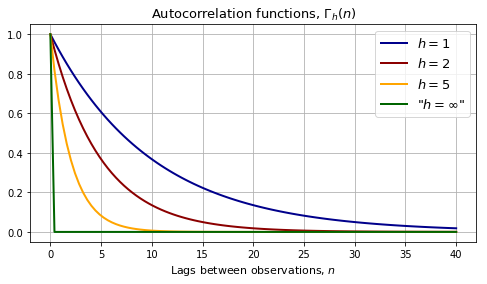

In [17]:
mu = .0
kappa = .1 
sigma = .5
var_uncond = sigma**2 / (2 * kappa) 

n_grid = np.linspace(0, 40, 100)
autocorr_h1 = np.exp(- kappa * n_grid * 1)
autocorr_h2 = np.exp(- kappa * n_grid * 2)
autocorr_h5 = np.exp(- kappa * n_grid * 5)
autocorr_h1000 = np.exp(- kappa * n_grid * 1e8)

fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(n_grid, autocorr_h1, label = r'$h = 1$', color = 'darkblue', lw = 2)
ax.plot(n_grid, autocorr_h2, label = r'$h = 2$', color = 'darkred', lw = 2)
ax.plot(n_grid, autocorr_h5, label = r'$h = 5$', color = 'orange', lw = 2)
ax.plot(n_grid, autocorr_h1000, label = r'"$h = \infty$"', color = 'darkgreen', lw = 2)
ax.legend(loc = 'best', fontsize = 13)
ax.grid()
ax.set_title(r'Autocorrelation functions, $\Gamma_h(n)$', fontsize = 13)
ax.set_xlabel(r'Lags between observations, $n$', fontsize = 11)
plt.show()

### Frequency and the mean estimator

Consider again the AR(1) process generated by discrete sampling with frequency $h$. Assume that we have a sample of size $N$ and we would like to estimate the unconditional mean -- in our case the true mean is $\mu$. 

Again, the sample average is an unbiased estimator of the unconditional mean.

$$ \mathbb{E}[\bar X_N] = \frac{1}{N}\sum_{i = 1}^N \mathbb{E}[X_i] = \mathbb{E}[X_0] = \mu $$

The variance of the sample mean is given by

\begin{align}
\mathbb{V}\left(\bar X_N\right) &= \mathbb{V}\left(\frac{1}{N}\sum_{i = 1}^N X_i\right) \\
&= \frac{1}{N^2} \left(\sum_{i = 1}^N \mathbb{V}(X_i) + 2 \sum_{i = 1}^{N-1} \sum_{s = i+1}^N \text{cov}(X_i, X_s) \right) \\
&= \frac{1}{N^2} \left( N \gamma(0) + 2 \sum_{i=1}^{N-1} i \cdot \gamma\left(h\cdot (N - i)\right) \right) \\
&= \frac{1}{N^2} \left( N \frac{\sigma^2}{2\kappa} + 2 \sum_{i=1}^{N-1} i \cdot \exp(-\kappa h (N - i)) \frac{\sigma^2}{2\kappa} \right)
\end{align}

It is explicit in the above equation that time dependence in the data inflates the variance of the mean estimator through the covariance terms. Moreover, as we can see, a higher sampling frequency---smaller $h$---makes all the covariance terms larger everything else being fixed. This implies a relatively slower rate of convergence of the sample average for high frequency data. Intuitively, the stronger dependence across observations  for high frequency data reduces the "information content" of each observation relative to the iid case.

We can upper bound the variance term in the following way.

\begin{align}
\mathbb{V}(\bar X_N) &= \frac{1}{N^2} \left( N \sigma^2 + 2 \sum_{i=1}^{N-1} i \cdot \exp(-\kappa h (N - i)) \sigma^2 \right) \\
&\leq \frac{\sigma^2}{2\kappa N} \left(1 + 2 \sum_{i=1}^{N-1} \cdot \exp(-\kappa h (i)) \right) \\
&= \underbrace{\frac{\sigma^2}{2\kappa N}}_{\text{i.i.d.  case}} \left(1 + 2 \frac{1 - \exp(-\kappa h)^{N-1}}{1 - \exp(-\kappa h)} \right)
\end{align}

Asymptotically the $\exp(-\kappa h)^{N-1}$ vanishes and the dependence in the data inflates the benchmark iid variance by a factor of $\left(1 + 2 \frac{1}{1 - \exp(-\kappa h)} \right)$. This long run factor is larger the higher is  the frequency (the smaller is $h$).

Therefore, we expect the asymptotic relative MSEs, $B$, to change with time dependent data. We just saw that the mean estimator's rate is roughly changing by a factor of $\left(1 + 2 \frac{1}{1 - \exp(-\kappa h)} \right)$. Unfortunately, the variance estimator's MSE is harder to derive. Nonetheless, we can approximate it by using (large sample) simulations, thus getting an idea about how the asymptotic relative MSEs changes in the sampling frequency $h$ relative to the iid case that we compute in closed form.


In [18]:
def sample_generator(h, N, M):
    phi = (1 - np.exp(- kappa * h)) * mu
    rho = np.exp(- kappa * h)
    s = sigma**2 * (1 - np.exp(-2 * kappa * h)) / (2 * kappa)

    mean_uncond = mu
    std_uncond = np.sqrt(sigma**2 / (2 * kappa))

    eps_path = stat.norm(0, np.sqrt(s)).rvs((M, N)) 
    
    y_path = np.zeros((M, N + 1))
    y_path[:, 0] = stat.norm(mean_uncond, std_uncond).rvs(M)

    for i in range(N):
        y_path[:, i + 1] = phi + rho*y_path[:, i] + eps_path[:, i]
    
    return y_path


In [19]:
# generate large sample for different frequencies
N_app, M_app = 1000, 30000                      # sample size, number of simulations
h_grid = np.linspace(.1, 80, 30)

var_est_store = []
mean_est_store = []
labels = []

for h in h_grid:
    labels.append(h)
    sample = sample_generator(h, N_app, M_app)
    mean_est_store.append(np.mean(sample, 1))
    var_est_store.append(np.var(sample, 1))
    
var_est_store = np.array(var_est_store)
mean_est_store = np.array(mean_est_store)


In [20]:
# save mse of estimators
mse_mean = np.var(mean_est_store, 1) + (np.mean(mean_est_store, 1) - mu)**2
mse_var = np.var(var_est_store, 1) + (np.mean(var_est_store, 1) - var_uncond)**2

benchmark_rate = 2*var_uncond       # iid case

#relative MSE for large samples
rate_h = mse_var/mse_mean


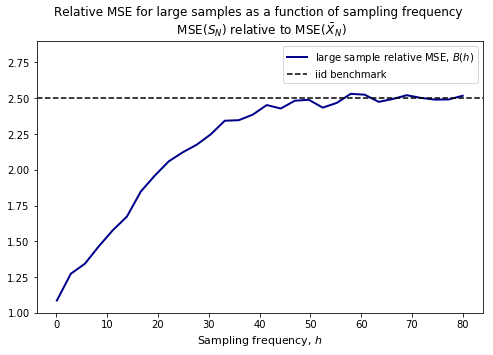

In [21]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(h_grid, rate_h, color = 'darkblue', lw = 2, 
        label = r'large sample relative MSE, $B(h)$')
ax.axhline(benchmark_rate, color = 'k', linestyle = '--', label = r'iid benchmark')
ax.set_title('Relative MSE for large samples as a function of sampling frequency \n MSE($S_N$) relative to MSE($\\bar X_N$)', 
             fontsize = 12)
ax.set_xlabel('Sampling frequency, $h$', fontsize = 11)
ax.set_ylim([1, 2.9])
ax.legend(loc = 'best', fontsize = 10)
plt.show()

The above figure illustrates the relationship between the asymptotic relative MSEs and the sampling frequency.

 * We can see that with low frequency data -- large values of $h$ -- the ratio of asymptotic rates approaches the iid case.  
 
 * As $h$ gets smaller -- the higher the frequency -- the relative performance of the variance estimator is better in the sense that the ratio of asymptotic rates gets smaller. That is, as the time dependence gets more pronounced, the rate of convergence of the mean estimator's MSE deteriorates more than that of the variance estimator.  

-----------------------------------------------------------

#### References

Black, F. and Litterman, R., 1992. "Global portfolio optimization". Financial analysts journal, 48(5), pp.28-43.

Dickey, J. 1975. "Bayesian alternatives to the F-test and least-squares estimate in the normal linear model", in: S.E. Fienberg and A. Zellner, eds., "Studies in Bayesian econometrics and statistics" (North-Holland, Amsterdam) 515-554. 

Hansen, Lars Peter and Thomas J. Sargent. 2001. "Robust Control and Model Uncertainty." American Economic Review, 91(2): 60-66.

Leamer, E.E., 1978. **Specification searches: Ad hoc inference with nonexperimental data**, (Vol. 53). John Wiley & Sons Incorporated.